In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
labels = df[0]
del df[0] 

In [4]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(df)

In [5]:
np.sum  (model_pca.explained_variance_ratio_)

0.99999314824536

In [6]:
tsne_model = TSNE(random_state=0, verbose=1)
tsne_model

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=1)

In [7]:
wine_tsne = tsne_model.fit_transform(wine_pca.reshape((len(wine_pca), -1)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.930435
[t-SNE] KL divergence after 900 iterations: 0.135609


In [8]:
wine_tsne.shape

(178, 2)

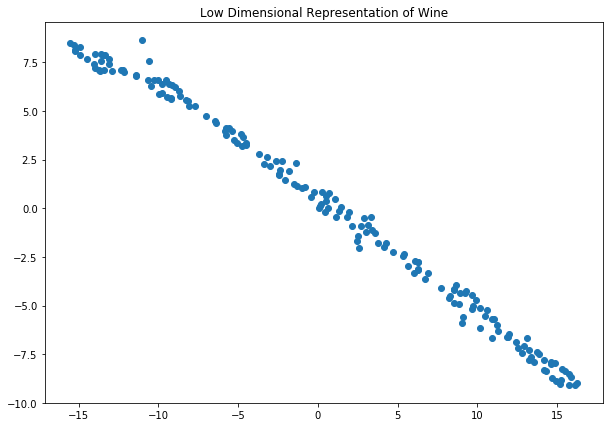

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(wine_tsne[:,0], wine_tsne[:,1]);
plt.title('Low Dimensional Representation of Wine');

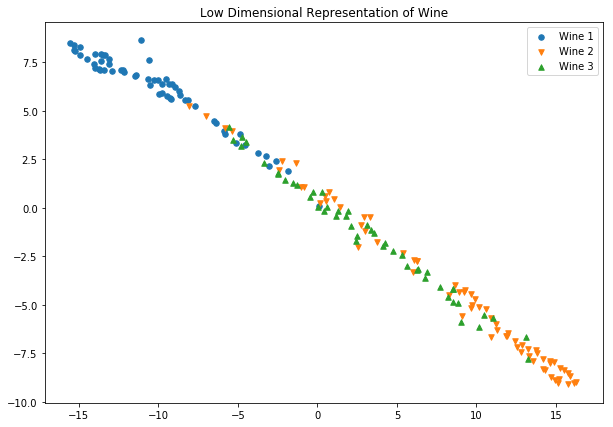

In [10]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine');
for i in range(1, 4):
    selections = wine_tsne[labels == i]
    plt.scatter(selections[:,0], selections[:,1], marker=MARKER[i-1], label=f'Wine {i}', s=30);
    plt.legend();